the goal of this workflow is to look for frequency of end of day pins on the spx index

In [1]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
stocks = yf.download(
    # tickers='^GSPC ^VIX',
    tickers = '^GSPC ^XSP ^VIX',
    # use "period" instead of start/end
    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # (optional, default is '1mo')
    period = "ytd",
    # start="2021-01-01", end="2022-01-01",
    # fetch data by interval (including intraday if period < 60 days)
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    # (optional, default is '1d')
    interval = "1d",
    # group by ticker (to access via data['SPY'])
    # (optional, default is 'column')
    group_by = 'ticker',
    # adjust all OHLC automatically
    # (optional, default is False)
    auto_adjust = True,
    # download pre/post regular market hours data
    # (optional, default is False)
    prepost = True,
    # use threads for mass downloading? (True/False/Integer)
    # (optional, default is True)
    threads = True
)
stocks = stocks.dropna()

[*********************100%***********************]  3 of 3 completed


In [3]:
select_ticker = '^GSPC'

In [4]:
stocks['stocks_ratio'] = [float(str(i)[2:7]) for i in stocks[select_ticker, 'Close']]
stocks['move'] =  stocks[select_ticker, 'Close'].diff()

In [5]:
stocks.head()

^GSPC                                                     \
                   Open         High          Low        Close      Volume   
Date                                                                         
2022-01-03  4778.140137  4796.640137  4758.169922  4796.560059  3831020000   
2022-01-04  4804.509766  4818.620117  4774.270020  4793.540039  4683170000   
2022-01-05  4787.990234  4797.700195  4699.439941  4700.580078  4887960000   
2022-01-06  4693.390137  4725.009766  4671.259766  4696.049805  4295280000   
2022-01-07  4697.660156  4707.950195  4662.740234  4677.029785  4181510000   

                 ^VIX                                                ^XSP  \
                 Open       High        Low      Close Volume        Open   
Date                                                                        
2022-01-03  17.600000  18.540001  16.559999  16.600000      0  477.809998   
2022-01-04  16.570000  17.809999  16.340000  16.910000      0  480.450012   
2022-01-05  17.070000  20.170000  16.580000  19.730000      0  478.799988   
2022-01-06  20.290001  21.059999  19.080000  19.610001      0  469.339996   
2022-01-07  19.850000  20.799999  18.570000  18.760000      0  469.769989   

                                                      stocks_ratio       move  
                  High         Low       Close Volume                          
Date                                                                           
2022-01-03  479.660004  475.820007  479.660004      0        96.56        NaN  
2022-01-04  481.859985  477.429993  479.350006      0        93.54  -3.020020  
2022-01-05  479.769989  469.940002  470.059998      0         0.58 -92.959961  
2022-01-06  472.500000  467.130005  469.609985      0        96.04  -4.530273  
2022-01-07  470.799988  466.269989  467.700012      0        77.02 -19.020020

In [6]:
# 10 wide bins
l = list(np.linspace(start=0, stop=110, num=12, endpoint=True)-5)
# 5 wide bins
# l = list(np.linspace(start=0, stop=105, num=22, endpoint=True)-2.5)

In [7]:
l

[-5.0, 5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0]

In [8]:
# Here we count. We intentionally wrap 97.5 up to 0 and add it to the histogram after. Then cut off the extra bin.
wins = stocks['stocks_ratio'][stocks.move > 0]
losers = stocks['stocks_ratio'][stocks.move < 0]
my_hist_win_final, my_hist_bins = np.histogram(wins, bins=l)
my_hist_lose_final, my_hist_bins = np.histogram(losers, bins=l)
# my_hist_final, my_hist_bins = np.histogram(stocks['stocks_ratio'], bins=list(np.linspace(start=0, stop=105, num=22, endpoint=True)-2.5))
my_hist_win_final[0] += my_hist_win_final[-1]
my_hist_win_final = my_hist_win_final[:-1]

my_hist_lose_final[0] += my_hist_lose_final[-1]
my_hist_lose_final = my_hist_lose_final[:-1]

In [9]:
my_hist_lose_final, my_hist_bins

(array([19,  8, 13, 18,  9, 11, 20, 11, 12, 14], dtype=int64),
 array([ -5.,   5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95.,
        105.]))

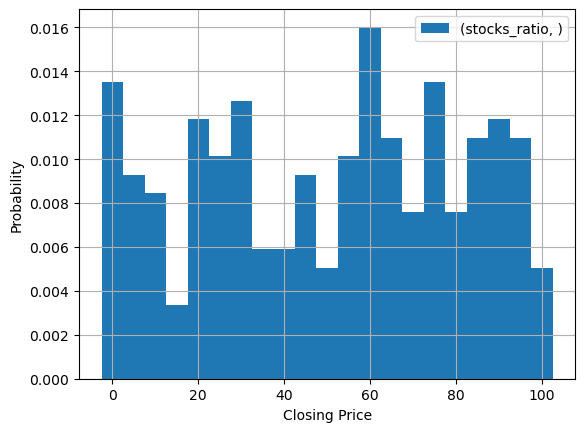

In [11]:
# built in pandas histogram. won't let me recenter. so i'm going to slice up the probabilities and reassemble.
ax = stocks.plot.hist(column='stocks_ratio', bins=list(np.linspace(start=0, stop=105, num=22, endpoint=True)-2.5), density=True)

ax.set_xlabel('Closing Price')

ax.set_ylabel('Probability')

ax.legend()

ax.grid()

In [12]:
bins_to_plot = [int((my_hist_bins[i]+my_hist_bins[i+1])/2) for i in range(len(my_hist_bins[:-2]))]

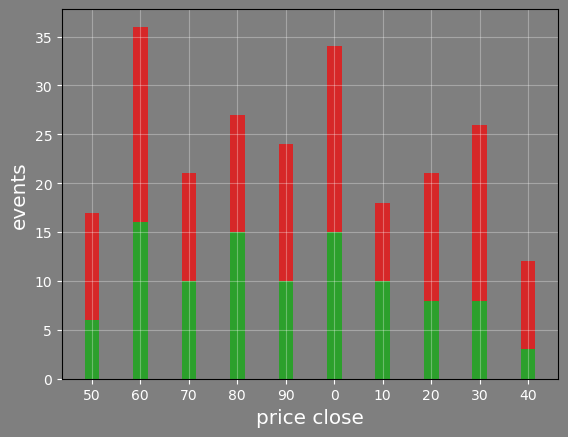

In [19]:
ax = plt.figure(facecolor='tab:grey')

tmp=plt.axes()

tmp.set_facecolor('tab:grey')

half_bin = int(bins_to_plot.__len__() / 2)

my_x = bins_to_plot[half_bin:]+bins_to_plot[:half_bin]

my_x = [str(i) for i in my_x]

my_y = list(my_hist_win_final[half_bin:]) + list(my_hist_win_final[:half_bin])

plt.bar(bins_to_plot, my_y, 3, color='tab:green')

my_y2 = list(my_hist_lose_final[half_bin:]) + list(my_hist_lose_final[:half_bin])

plt.bar(bins_to_plot, my_y2, 3, bottom=my_y, color='tab:red')

plt.xticks(bins_to_plot, my_x)

plt.tick_params(axis='both', colors='white')

plt.xlabel('price close', fontsize='x-large', color='white')

plt.ylabel('events', fontsize='x-large', color='white')

plt.grid(alpha=.3, color='white')

plt.savefig('all_closes', transparent=True)

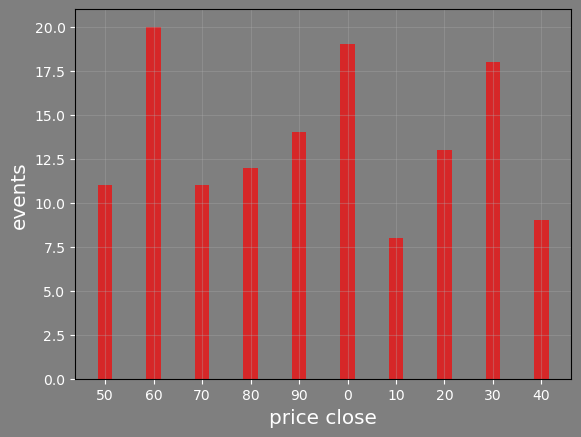

In [21]:
ax = plt.figure(facecolor='tab:grey')

tmp=plt.axes()

tmp.set_facecolor('tab:grey')

half_bin = int(bins_to_plot.__len__() / 2)

my_x = bins_to_plot[half_bin:]+bins_to_plot[:half_bin]

my_x = [str(i) for i in my_x]

my_y2 = list(my_hist_lose_final[half_bin:]) + list(my_hist_lose_final[:half_bin])

plt.bar(bins_to_plot, my_y2, 3, color='tab:red')

plt.xticks(bins_to_plot, my_x)

plt.tick_params(axis='both', colors='white')

plt.xlabel('price close', fontsize='x-large', color='white')

plt.ylabel('events', fontsize='x-large', color='white')

plt.grid(alpha=.3)

plt.savefig('red_closes', transparent=True)

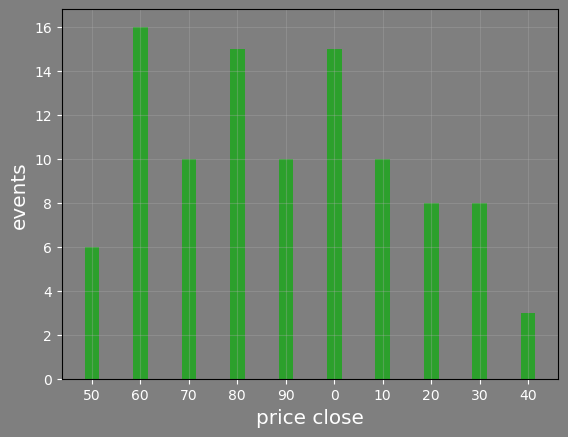

In [22]:
ax = plt.figure(facecolor='tab:grey')

tmp=plt.axes()

tmp.set_facecolor('tab:grey')

half_bin = int(bins_to_plot.__len__() / 2)

my_x = bins_to_plot[half_bin:]+bins_to_plot[:half_bin]

my_x = [str(i) for i in my_x]

my_y = list(my_hist_win_final[half_bin:]) + list(my_hist_win_final[:half_bin])

plt.bar(bins_to_plot, my_y, 3, color='tab:green')

plt.xticks(bins_to_plot, my_x)

plt.tick_params(axis='both', colors='white')

plt.xlabel('price close', fontsize='x-large', color='white')

plt.ylabel('events', fontsize='x-large', color='white')

plt.grid(alpha=.3)

plt.savefig('green_closes', transparent=True)